<p style="color:green;text-align:center;font-weight:bold;border:3px dotted green;font-size:22px">✨ Handwritten Digit Recognition with CNN✨<span style='font-size:26px; background-color:blue '></span></p>
<center><img src="https://miro.medium.com/max/1400/1*R8ZdNRRJlBs1tPkMSTwPHw.jpeg">

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>1 | Introduction 🎯</b></h2>
<h3 style="color:red"><B>✅ Competition Description</b></h3>

* In this competition, our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

<h3 style="color:red"><b>✅ Data Description</b></h3>

* The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

* The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

* Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

<h3 style="color:red"><b>✅ Model choice</b></h3>

In this kernel, I have created a model based on Deep Learning : <span style="color:green"><b>Convolutional Neural Network (CNN)</b></span> to recognize different handwritten digits and classify them. The dataset used here is actually from Digit Recognition Competition. Let's get started.

<center><img src="https://production-media.paperswithcode.com/method_collections/cnn.jpeg" style='border-radius:30px'>

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>2 | Import Necessary Librairies 📚</b></h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import colorama
from colorama import Fore
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>3 | Data Loading and Overview 📅</b></h2>

In [2]:
train_df=pd.read_csv("../input/digit-recognizer/train.csv")
test_df=pd.read_csv("../input/digit-recognizer/test.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(Fore.BLUE +f"The train set has",Fore.GREEN+f"{train_df.shape[0]}",Fore.BLUE +"rows and",Fore.GREEN+f"{train_df.shape[1]}",Fore.BLUE +"columns")
print(Fore.BLUE +f"The test set has",Fore.GREEN+f"{test_df.shape[0]}",Fore.BLUE +"rows and",Fore.GREEN+f"{test_df.shape[1]}",Fore.BLUE +"columns")

The train set has 42000 rows and 785 columns
The test set has 28000 rows and 784 columns


In [5]:
train_na=train_df.isna().sum().sum()
test_na=test_df.isna().sum().sum()
print(Fore.BLUE +f"The number of missing values in train set is :", Fore.GREEN+f"{train_na}")
print(Fore.BLUE +f"The number of missing values in test set is :", Fore.GREEN+f"{test_na}")

The number of missing values in train set is : 0
The number of missing values in test set is : 0


<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>4 | Visualization of the target variable 👁‍🗨👀</b></h2>

In [6]:
X = train_df.drop("label", axis=1)
Y=train_df["label"]

In [7]:
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

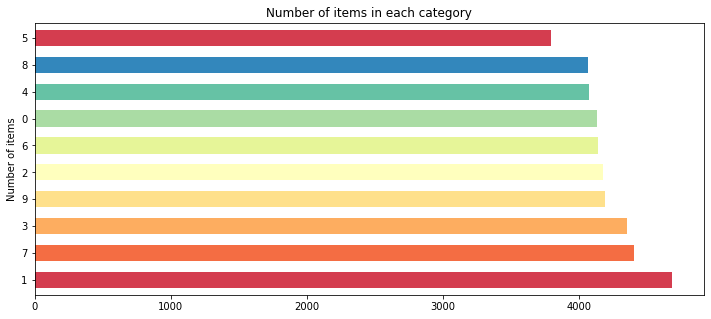

In [8]:
result=Y.value_counts().sort_values(ascending=False)
result.plot.barh(color=sns.color_palette("Spectral", 9),width = 0.6, figsize=(12,5))
plt.title("Number of items in each category")
plt.ylabel('Number of items')
plt.show()

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>5 | Visualization of the features variables 📈📊</b></h2>

In [9]:
X = X.values.reshape(-1,28,28,1)
X_test = test_df.values.reshape(-1,28,28,1)
X.shape, X.shape

((42000, 28, 28, 1), (42000, 28, 28, 1))

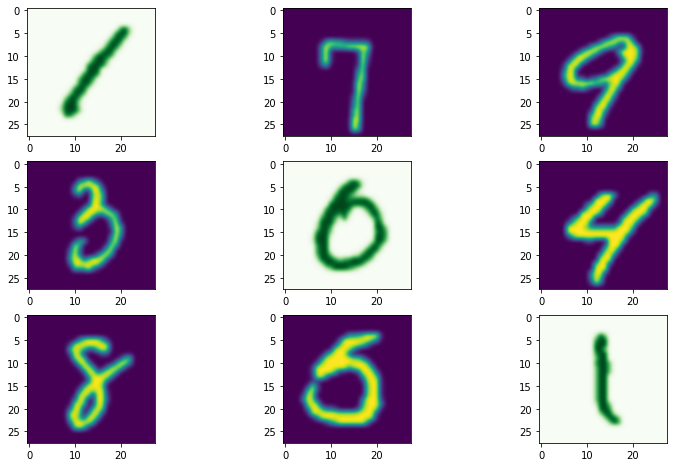

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(13, 8))
ax[0,0].imshow(X[0], cmap = 'Greens', interpolation='bicubic')
ax[0,1].imshow(X[50], cmap = 'viridis', interpolation='bicubic')
ax[0,2].imshow(X[100], cmap = 'viridis', interpolation='bicubic')
ax[1,0].imshow(X[150], cmap = 'viridis', interpolation='bicubic')
ax[1,1].imshow(X[200], cmap = 'Greens', interpolation='bicubic')
ax[1,2].imshow(X[250], cmap = 'viridis', interpolation='bicubic')
ax[2,0].imshow(X[300], cmap = 'viridis', interpolation='bicubic')
ax[2,1].imshow(X[350], cmap = 'viridis', interpolation='bicubic')
ax[2,2].imshow(X[400], cmap = 'Greens', interpolation='bicubic')

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>6 | Data preprocessing ♻</b></h2>

In [11]:
# Data normalization
X = X/255
X_test = X_test/255

In [12]:
# one-hot encode target column
Y = to_categorical(Y, num_classes = 10)

In [13]:
# Spliting Data in training and testing set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=42)

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>7 | Building a CNN model ⚔</b></h2>

In [14]:
#create model
model = models.Sequential()
# Add layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

2022-08-01 10:08:25.970130: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

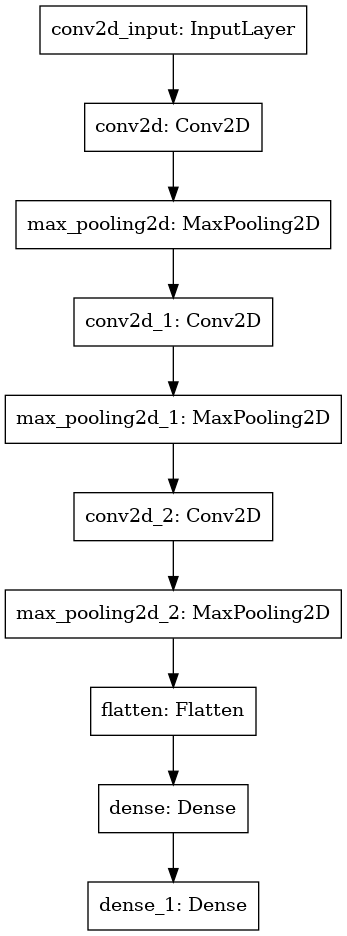

In [18]:
# Visualization of the model
tf.keras.utils.plot_model(model)

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_val, Y_val))

2022-08-01 10:08:28.157514: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
919/919 [==============================] - 18s 18ms/step - loss: 0.3194 - accuracy: 0.8999 - val_loss: 0.1333 - val_accuracy: 0.9569
Epoch 2/10
919/919 [==============================] - 13s 15ms/step - loss: 0.1020 - accuracy: 0.9683 - val_loss: 0.1017 - val_accuracy: 0.9669
Epoch 3/10
919/919 [==============================] - 13s 14ms/step - loss: 0.0721 - accuracy: 0.9778 - val_loss: 0.1010 - val_accuracy: 0.9680
Epoch 4/10
919/919 [==============================] - 14s 15ms/step - loss: 0.0567 - accuracy: 0.9815 - val_loss: 0.0600 - val_accuracy: 0.9813
Epoch 5/10
919/919 [==============================] - 13s 14ms/step - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.0707 - val_accuracy: 0.9790
Epoch 6/10
919/919 [==============================] - 13s 14ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0581 - val_accuracy: 0.9825
Epoch 7/10
919/919 [==============================] - 13s 14ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0651 - val_accuracy:

<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>8 | Model evaluation & accuracy</b></h2>

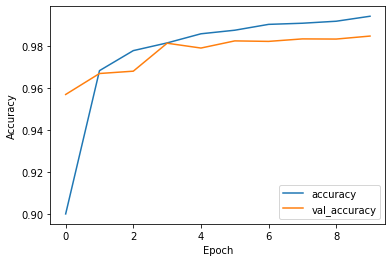

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

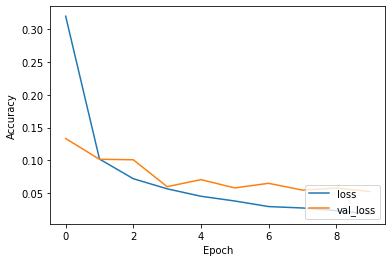

In [21]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [22]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train)
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

919/919 [==============================] - 4s 5ms/step - loss: 0.0087 - accuracy: 0.9973
Train loss:  0.00866283942013979
Train accuracy:  0.9973129034042358


In [23]:
validation_loss, validation_accuracy = model.evaluate(X_val, Y_val)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

394/394 [==============================] - 2s 4ms/step - loss: 0.0525 - accuracy: 0.9848
Validation loss:  0.05253416672348976
Validation accuracy:  0.9847618937492371


<h2 style="padding: 8px;color:green;border-bottom: 3px solid green"><b>9 | Prediction & submission</b></h2>

In [24]:
# predict results
results = model.predict(X_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [25]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)